# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN_Inventory','UAN','Urea']]
df_96on.tail() #I will not analyze urea, monthly imports, or urea_prod as x variables

,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,UAN_Inventory,UAN,Urea
1060,4/29/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,537504.7397,998987.8733,212.16,232
1061,5/6/2016,93.888,45.32,377.50,2.240,50.65,NaN,NaN,539602.5479,998988.0000,209.92,225
1062,5/13/2016,94.608,46.90,390.75,2.240,50.55,NaN,NaN,539602.5479,1044391.0000,194.88,212
1063,5/20/2016,95.334,48.41,396.75,2.210,50.95,NaN,NaN,539602.5479,1044391.0000,194.88,200
1064,5/27/2016,95.521,49.74,414.25,2.280,51.35,NaN,NaN,539602.5479,1044391.0000,190.08,189


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports           float64
Urea_Prod                 float64
Urea_Inventory            float64
UAN_Inventory             float64
UAN                       float64
Urea                        int64
dtype: object

In [3]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,UAN_Inventory,UAN,Urea
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1061.000000,1061.000000,1065.000000,1065.00000,1065.000000,1065.000000
mean,90.686437,54.766047,361.844601,4.591435,58.248356,437187.532516,321115.623341,380120.750993,1005551.69917,183.728826,259.853521
std,11.690870,31.201783,156.439642,2.364473,33.522904,225504.296101,97546.382244,151950.273082,490085.20571,96.415215,135.468274
min,71.657000,11.260000,182.500000,1.661000,20.900000,76875.000000,129670.329700,115938.863000,297701.14940,58.000000,83.000000
25%,81.208000,26.440000,231.250000,2.756000,27.425593,273276.000000,246470.588200,259565.000000,650601.51370,101.200000,152.000000
50%,87.920000,49.130000,326.500000,4.021000,51.800000,397255.000000,287209.302300,368370.000000,850475.86020,165.200000,240.000000
75%,98.703000,81.930000,424.250000,5.812000,78.700000,562811.000000,419000.000000,480612.000000,1245263.15800,256.960000,335.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,1400000.000000,549000.000000,843000.000000,2588392.85700,514.880000,825.000000


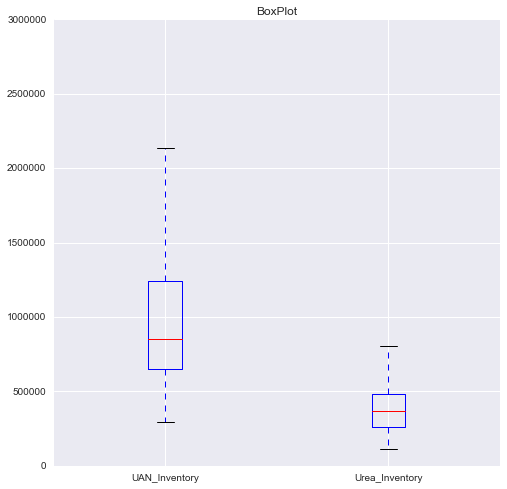

In [4]:
plt.show(df_96on[['UAN_Inventory','Urea_Inventory']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

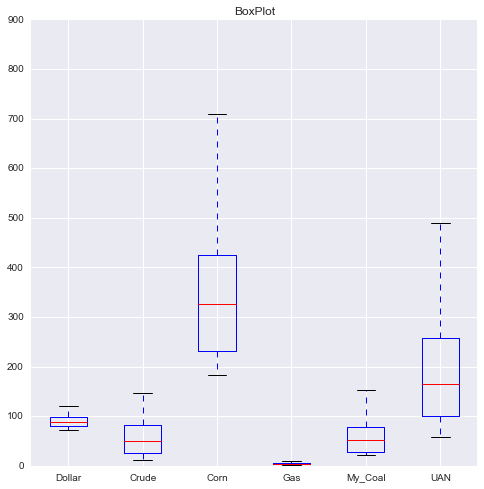

In [5]:
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','UAN']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [6]:
#no monthly import or urea now
df_96on = df_96on[['Date','Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
df_96on.corr()

,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,UAN_Inventory,UAN
Dollar,1.000000,-0.775055,-0.681433,-0.331055,-0.755376,0.507274,0.526042,-0.699337
Crude,-0.775055,1.000000,0.777172,0.393669,0.894894,-0.583456,-0.583916,0.878953
Corn,-0.681433,0.777172,1.000000,-0.002028,0.835134,-0.357296,-0.370982,0.817156
Gas,-0.331055,0.393669,-0.002028,1.000000,0.285667,-0.246187,-0.481141,0.343864
My_Coal,-0.755376,0.894894,0.835134,0.285667,1.000000,-0.450888,-0.491358,0.896664
Urea_Inventory,0.507274,-0.583456,-0.357296,-0.246187,-0.450888,1.000000,0.707155,-0.474596
UAN_Inventory,0.526042,-0.583916,-0.370982,-0.481141,-0.491358,0.707155,1.000000,-0.529562
UAN,-0.699337,0.878953,0.817156,0.343864,0.896664,-0.474596,-0.529562,1.000000


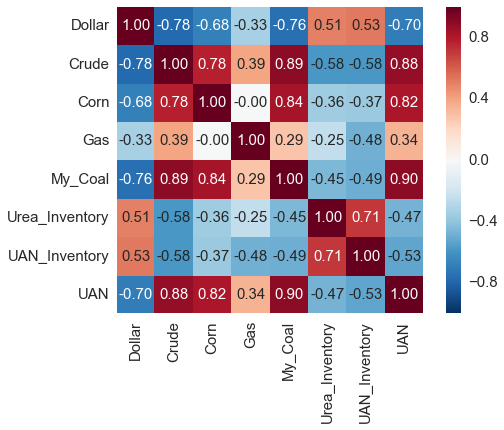

In [7]:
cols= ['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#dollar corr to crude, corn, coal, urea_inv, uan_inv & UAN
#crude corr to dollar, corn, coal, urea_inv, uan_inv & UAN
#corn corr to dollar, crude, coal & UAN
#gas corr to nothing
#coal corr to dollar, crude, corn & UAN
#urea_inv corr to dollar, crude, uan_inv
#uan_inv corr to dollar, crude, urea_inv & UAN
#UAN corr to dollar, crude, corn, coal, uan_inv

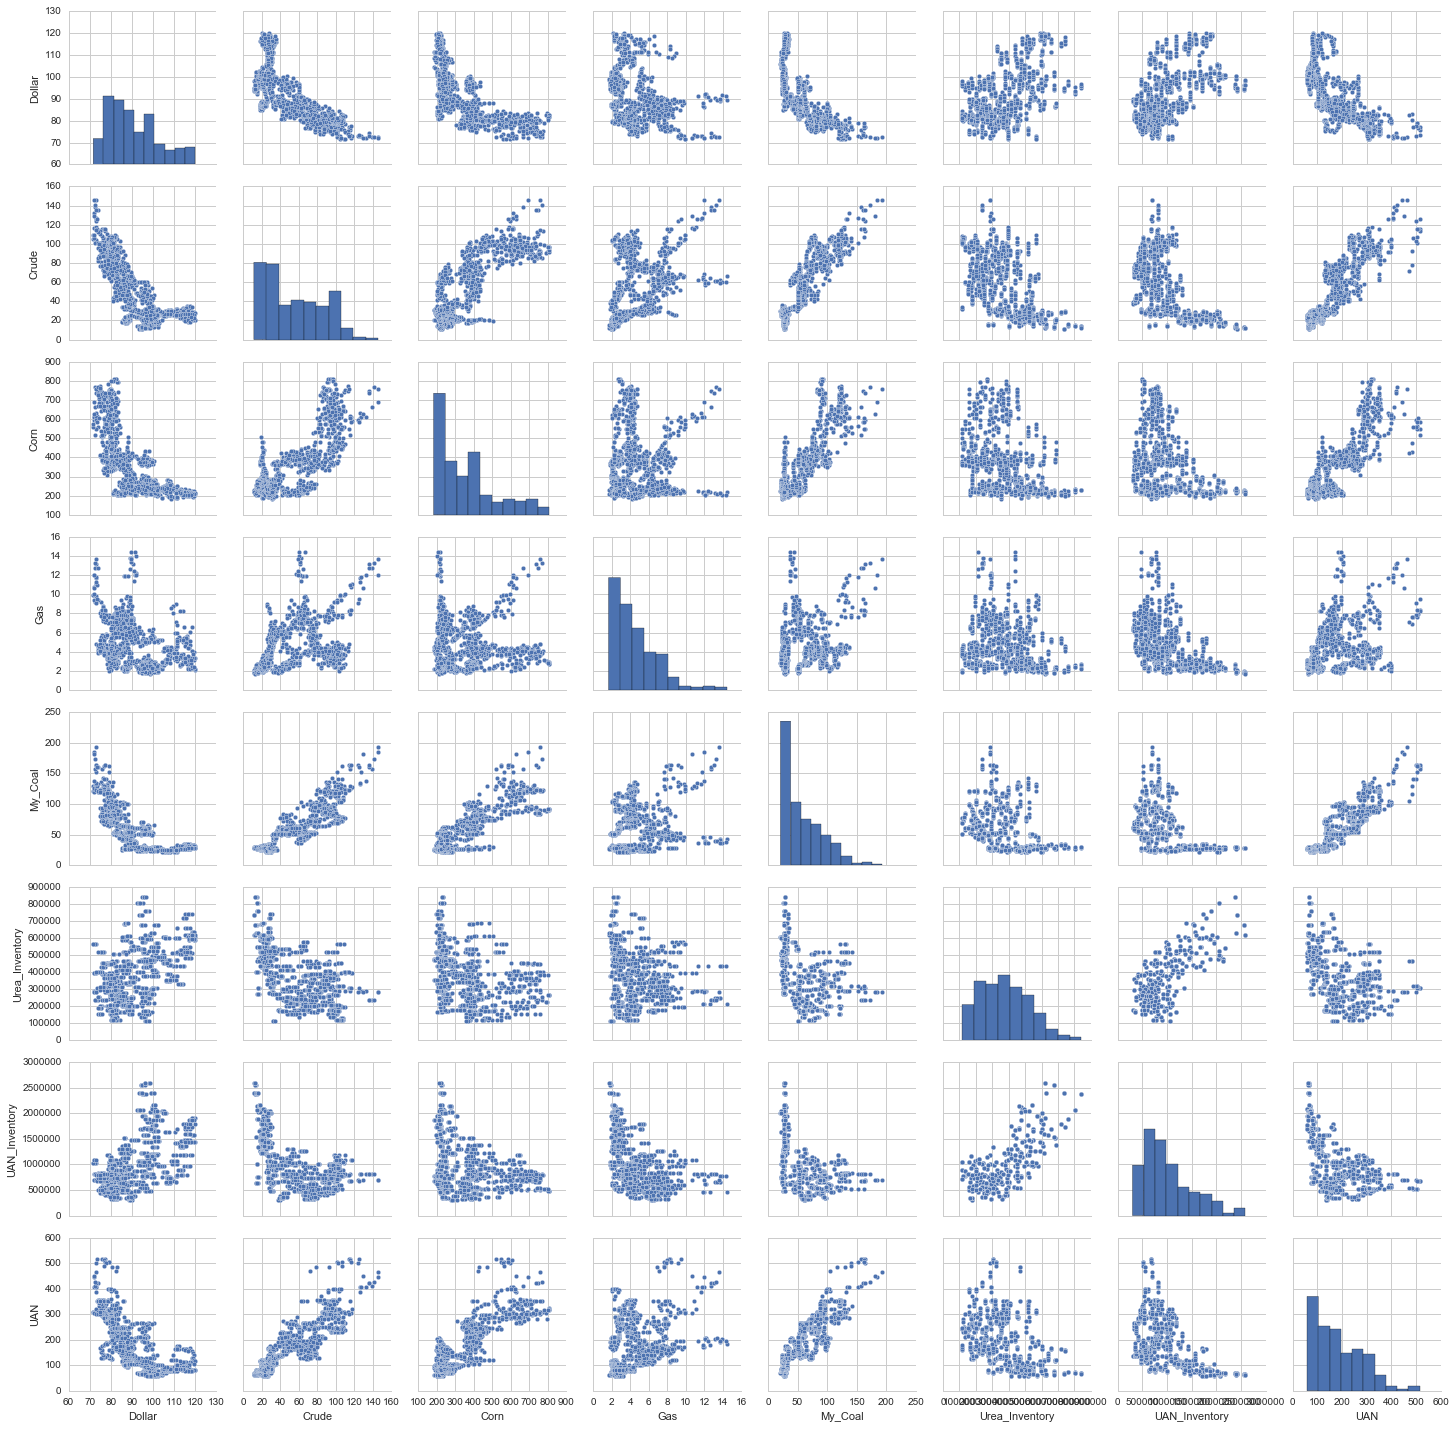

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

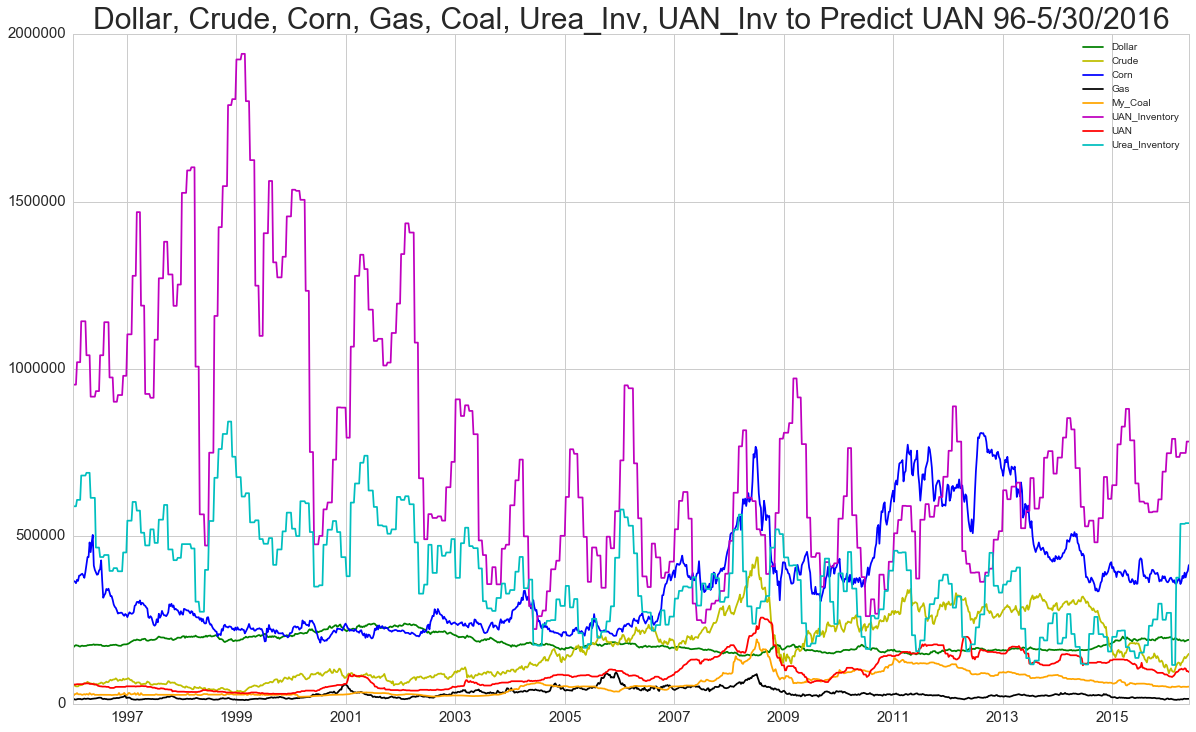

In [10]:
#trend, just modify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6500
y5 = (df_96on['My_Coal'])*1000
y6 = (df_96on['UAN_Inventory'])*.75
y7 = (df_96on['UAN'])*500
y9 = (df_96on['Urea_Inventory'])


fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'r')

ax.plot(x,y9,'c')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas, Coal, Urea_Inv, UAN_Inv to Predict UAN 96-5/30/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables highly correlated to each other

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #both inventories p-values are too large so we know we must get rid of some variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     933.6
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:30:26   Log-Likelihood:                -5326.4
No. Observations:                1065   AIC:                         1.067e+04
Df Residuals:                    1057   BIC:                         1.071e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            -95.6619     18.119     -5.280      0.000      -131.215   -60.109
Dollar             0.8591      0.159      5.388      0.000         0.546     1.172
Crude              0.7348      0.100      7.328      0.000         0.538     0.932
Corn               0.2119      0.016     13.356      0.000         0.181     0.243
Gas                6.0918      0.677      8.997      0.000         4.763     7.420
My_Coal            1.1721      0.087     13.397      0.000         1.000     1.344
Urea_Inventory -1.638e-05   1.16e-05     -1.410      0.159     -3.92e-05  6.41e-06
UAN_Inventory  -5.423e-06    3.7e-06     -1.467      0.143     -1.27e-05  1.83e-06
==============================================================================
Omnibus:                      132.908   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.804
Skew:                           0.702   Prob(JB):                     1.96e-68
Kurtosis:                       5.248   Cond. No.                     1.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#something is not right with this
corr = np.corrcoef(X)
eigenvalues, eigenvectors = np.linalg.eig(corr)
print(eigenvalues)

[  1.04176796e+03+0.j   2.32319676e+01+0.j   6.86743258e-05+0.j ...,
  -2.38878755e-16+0.j   1.33724748e-16+0.j   7.91532713e-16+0.j]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

#order is 'Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory'
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #selector starts at second boolean in array 
#indicating using dollar, crude, corn, gas, coal

Optimal number of features: 5
[array([False,  True,  True,  True,  True,  True, False, False], dtype=bool)]
[4 1 1 1 1 1 2 3]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Forward Selection (want lowest AIC and p-values no greater than 0.05)

In [14]:
#dollar
X = df_96on[['Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12041.4174701
const     3.753758e-233
Dollar    3.441236e-157
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1018.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):          3.44e-157
Time:                        07:31:04   Log-Likelihood:                -6018.7
No. Observations:                1065   AIC:                         1.204e+04
Df Residuals:                    1063   BIC:                         1.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        706.7598     16.532     42.751      0.000       674.320   739.199
Dollar        -5.7675      0.181    -31.899      0.000        -6.122    -5.413
==============================================================================
Omnibus:                       66.558   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.827
Skew:                           0.614   Prob(JB):                     7.64e-18
Kurtosis:                       3.517   Cond. No.                         716.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11179.4747169
const    1.634353e-32
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3611.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:05   Log-Likelihood:                -5587.7
No. Observations:                1065   AIC:                         1.118e+04
Df Residuals:                    1063   BIC:                         1.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.9835      2.849     12.281      0.000        29.394    40.573
Crude          2.7160      0.045     60.089      0.000         2.627     2.805
==============================================================================
Omnibus:                      152.359   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.306
Skew:                           0.750   Prob(JB):                     8.00e-90
Kurtosis:                       5.645   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11583.1220326
const     7.276314e-01
Corn     1.375991e-256
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2136.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):          1.38e-256
Time:                        07:31:06   Log-Likelihood:                -5789.6
No. Observations:                1065   AIC:                         1.158e+04
Df Residuals:                    1063   BIC:                         1.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4963      4.295      0.348      0.728        -6.931     9.924
Corn           0.5036      0.011     46.221      0.000         0.482     0.525
==============================================================================
Omnibus:                      183.984   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.025
Skew:                           0.991   Prob(JB):                     1.83e-83
Kurtosis:                       5.158   Cond. No.                         994.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11020.9881575
const      7.589325e-35
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     4361.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:07   Log-Likelihood:                -5508.5
No. Observations:                1065   AIC:                         1.102e+04
Df Residuals:                    1063   BIC:                         1.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.5124      2.624     12.770      0.000        28.363    38.662
My_Coal        2.5789      0.039     66.035      0.000         2.502     2.656
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.295
Skew:                           0.073   Prob(JB):                        0.523
Kurtosis:                       3.090   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12622.5753045
const    9.201972e-74
Gas      6.342791e-31
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     142.5
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           6.34e-31
Time:                        07:31:10   Log-Likelihood:                -6309.3
No. Observations:                1065   AIC:                         1.262e+04
Df Residuals:                    1063   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        119.3495      6.065     19.680      0.000       107.449   131.249
Gas           14.0216      1.174     11.939      0.000        11.717    16.326
==============================================================================
Omnibus:                       99.135   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.704
Skew:                           0.817   Prob(JB):                     2.27e-27
Kurtosis:                       2.693   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#uan inventory
X = df_96on[['UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12406.0918915
const            5.700565e-284
UAN_Inventory     4.968253e-78
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     414.3
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           4.97e-78
Time:                        07:31:35   Log-Likelihood:                -6201.0
No. Observations:                1065   AIC:                         1.241e+04
Df Residuals:                    1063   BIC:                         1.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           288.4887      5.725     50.390      0.000       277.255   299.723
UAN_Inventory    -0.0001   5.12e-06    -20.354      0.000        -0.000 -9.41e-05
==============================================================================
Omnibus:                       82.330   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.807
Skew:                           0.704   Prob(JB):                     1.29e-22
Kurtosis:                       3.537   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#urea_inventory
X = df_96on[['Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12484.8014562
const             1.275076e-231
Urea_Inventory     6.352037e-61
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           6.35e-61
Time:                        07:31:12   Log-Likelihood:                -6240.4
No. Observations:                1065   AIC:                         1.248e+04
Df Residuals:                    1063   BIC:                         1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            298.1982      7.012     42.527      0.000       284.439   311.957
Urea_Inventory    -0.0003   1.71e-05    -17.580      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      158.620   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.709
Skew:                           1.047   Prob(JB):                     6.55e-52
Kurtosis:                       3.964   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 2 now using 2 variables (coal had lowest AIC)

In [22]:
#coal & dollar
X = df_96on[['My_Coal', 'Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11016.8357969
const       1.952208e-05
My_Coal    1.589940e-224
Dollar      1.327458e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2194.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:40   Log-Likelihood:                -5505.4
No. Observations:                1065   AIC:                         1.102e+04
Df Residuals:                    1062   BIC:                         1.103e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         78.3494     18.265      4.290      0.000        42.511   114.188
My_Coal        2.4675      0.059     41.503      0.000         2.351     2.584
Dollar        -0.4229      0.170     -2.480      0.013        -0.757    -0.088
==============================================================================
Omnibus:                        2.023   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.911
Skew:                           0.069   Prob(JB):                        0.385
Kurtosis:                       3.155   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#crude & coal
X = df_96on[['Crude', 'My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10849.8356189
const      1.100686e-24
Crude      2.016905e-39
My_Coal    7.282541e-74
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2657.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:42   Log-Likelihood:                -5421.9
No. Observations:                1065   AIC:                         1.085e+04
Df Residuals:                    1062   BIC:                         1.086e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.0920      2.480     10.519      0.000        21.225    30.959
Crude          1.1874      0.087     13.693      0.000         1.017     1.358
My_Coal        1.5899      0.081     19.697      0.000         1.431     1.748
==============================================================================
Omnibus:                       33.947   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.339
Skew:                           0.203   Prob(JB):                     6.48e-15
Kurtosis:                       4.144   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#coal and corn
X = df_96on[['My_Coal','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10935.6701208
const       4.508714e-06
My_Coal    8.494060e-143
Corn        1.068137e-20
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2410.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:43   Log-Likelihood:                -5464.8
No. Observations:                1065   AIC:                         1.094e+04
Df Residuals:                    1062   BIC:                         1.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.7470      3.199      4.610      0.000         8.471    21.023
My_Coal        2.0365      0.068     29.869      0.000         1.903     2.170
Corn           0.1392      0.015      9.526      0.000         0.111     0.168
==============================================================================
Omnibus:                       27.354   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.704
Skew:                           0.360   Prob(JB):                     3.55e-07
Kurtosis:                       3.387   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#coal and gas
X = df_96on[['My_Coal','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10976.4625464
const      4.811010e-10
My_Coal    0.000000e+00
Gas        9.776352e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2299.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:47   Log-Likelihood:                -5485.2
No. Observations:                1065   AIC:                         1.098e+04
Df Residuals:                    1062   BIC:                         1.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.2015      3.215      6.284      0.000        13.893    26.510
My_Coal        2.5004      0.040     62.683      0.000         2.422     2.579
Gas            3.8946      0.566      6.886      0.000         2.785     5.004
==============================================================================
Omnibus:                        3.966   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.091
Skew:                           0.091   Prob(JB):                        0.129
Kurtosis:                       3.242   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#coal and urea_inventory
X = df_96on[['My_Coal','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10988.7353505
const             2.193819e-28
My_Coal           0.000000e+00
Urea_Inventory    5.127858e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2267.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:48   Log-Likelihood:                -5491.4
No. Observations:                1065   AIC:                         1.099e+04
Df Residuals:                    1062   BIC:                         1.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             61.4605      5.402     11.378      0.000        50.861    72.060
My_Coal            2.4645      0.043     57.213      0.000         2.380     2.549
Urea_Inventory -5.599e-05    9.5e-06     -5.892      0.000     -7.46e-05 -3.73e-05
==============================================================================
Omnibus:                        7.806   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.045
Skew:                           0.072   Prob(JB):                      0.00659
Kurtosis:                       3.453   Cond. No.                     1.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#coal and UAN inventory
X = df_96on[['My_Coal','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10964.7090573
const             7.506518e-38
My_Coal          8.122438e-315
UAN_Inventory     2.506884e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2331.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:49   Log-Likelihood:                -5479.4
No. Observations:                1065   AIC:                         1.096e+04
Df Residuals:                    1062   BIC:                         1.098e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            66.3722      4.960     13.381      0.000        56.640    76.105
My_Coal           2.4131      0.044     55.284      0.000         2.327     2.499
UAN_Inventory -2.308e-05   2.99e-06     -7.729      0.000     -2.89e-05 -1.72e-05
==============================================================================
Omnibus:                        8.472   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.731
Skew:                          -0.035   Prob(JB):                      0.00284
Kurtosis:                       3.509   Cond. No.                     4.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3 now using 3 variables (coal and crude had lowest AIC)

In [28]:
#coal, crude, dollar
X = df_96on[['My_Coal','Crude','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10847.4923155
const      5.346185e-01
My_Coal    6.650337e-74
Crude      5.415323e-39
Dollar     3.755746e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1778.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:55   Log-Likelihood:                -5419.7
No. Observations:                1065   AIC:                         1.085e+04
Df Residuals:                    1061   BIC:                         1.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -11.2435     18.100     -0.621      0.535       -46.760    24.273
My_Coal        1.6275      0.083     19.705      0.000         1.465     1.790
Crude          1.2523      0.092     13.609      0.000         1.072     1.433
Dollar         0.3483      0.167      2.082      0.038         0.020     0.677
==============================================================================
Omnibus:                       30.261   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.112
Skew:                           0.201   Prob(JB):                     1.78e-12
Kurtosis:                       4.029   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#coal, crude, corn
X = df_96on[['My_Coal','Crude','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10780.1245229
const      3.180335e-04
My_Coal    6.699940e-38
Crude      5.434852e-36
Corn       2.904495e-17
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1917.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:56   Log-Likelihood:                -5386.1
No. Observations:                1065   AIC:                         1.078e+04
Df Residuals:                    1061   BIC:                         1.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.7911      2.988      3.612      0.000         4.929    16.653
My_Coal        1.2052      0.090     13.392      0.000         1.029     1.382
Crude          1.0992      0.085     13.006      0.000         0.933     1.265
Corn           0.1176      0.014      8.597      0.000         0.091     0.144
==============================================================================
Omnibus:                      106.479   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.042
Skew:                           0.574   Prob(JB):                     8.34e-55
Kurtosis:                       5.072   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#coal, crude, gas
X = df_96on[['My_Coal','Crude','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10842.450644
const      9.768900e-12
My_Coal    7.948563e-76
Crude      2.648222e-31
Gas        2.235551e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1788.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:31:57   Log-Likelihood:                -5417.2
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1061   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.7821      3.018      6.887      0.000        14.861    26.704
My_Coal        1.6304      0.081     20.010      0.000         1.471     1.790
Crude          1.0972      0.091     12.022      0.000         0.918     1.276
Gas            1.7186      0.561      3.064      0.002         0.618     2.819
==============================================================================
Omnibus:                       30.775   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.863
Skew:                           0.199   Prob(JB):                     7.40e-13
Kurtosis:                       4.049   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#coal, crude, urea_inventory
X = df_96on[['My_Coal','Crude','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10851.8223497
const             4.931925e-06
My_Coal           1.546174e-71
Crude             6.181957e-32
Urea_Inventory    9.084860e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1769.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:01   Log-Likelihood:                -5421.9
No. Observations:                1065   AIC:                         1.085e+04
Df Residuals:                    1061   BIC:                         1.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             26.6966      5.815      4.591      0.000        15.287    38.106
My_Coal            1.5917      0.082     19.327      0.000         1.430     1.753
Crude              1.1824      0.097     12.158      0.000         0.992     1.373
Urea_Inventory -1.148e-06   9.98e-06     -0.115      0.908     -2.07e-05  1.84e-05
==============================================================================
Omnibus:                       34.036   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.723
Skew:                           0.202   Prob(JB):                     5.35e-15
Kurtosis:                       4.148   Cond. No.                     1.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#coal, crude, UAN inventory
X = df_96on[['My_Coal','Crude','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10840.7675743
const            3.813509e-15
My_Coal          8.726460e-76
Crude            4.139584e-29
UAN_Inventory    9.007166e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1792.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:02   Log-Likelihood:                -5416.4
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1061   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            41.1835      5.162      7.979      0.000        31.055    51.312
My_Coal           1.6130      0.081     20.004      0.000         1.455     1.771
Crude             1.0726      0.093     11.541      0.000         0.890     1.255
UAN_Inventory -1.009e-05   3.03e-06     -3.329      0.001      -1.6e-05 -4.14e-06
==============================================================================
Omnibus:                       33.553   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.333
Skew:                           0.146   Prob(JB):                     1.96e-16
Kurtosis:                       4.243   Cond. No.                     4.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### step 4 use 4 variables (coal, crude, corn had lowest AIC)

In [33]:
#coal, crude, corn, dollar
X = df_96on[['My_Coal','Crude','Corn','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10772.5603496
const      1.468449e-02
My_Coal    1.074930e-39
Crude      1.073210e-37
Corn       2.163565e-18
Dollar     2.038230e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1452.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:05   Log-Likelihood:                -5381.3
No. Observations:                1065   AIC:                         1.077e+04
Df Residuals:                    1060   BIC:                         1.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -43.6026     17.840     -2.444      0.015       -78.609    -8.597
My_Coal        1.2447      0.091     13.748      0.000         1.067     1.422
Crude          1.1894      0.089     13.351      0.000         1.015     1.364
Corn           0.1221      0.014      8.911      0.000         0.095     0.149
Dollar         0.5020      0.162      3.092      0.002         0.183     0.820
==============================================================================
Omnibus:                      101.934   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.486
Skew:                           0.571   Prob(JB):                     2.96e-49
Kurtosis:                       4.931   Cond. No.                     6.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#coal, crude, corn, gas
X = df_96on[['My_Coal','Crude','Corn','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10696.5065853
const      3.529563e-05
My_Coal    1.776285e-33
Crude      7.111706e-16
Corn       7.164683e-34
Gas        2.729469e-20
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1579.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:06   Log-Likelihood:                -5343.3
No. Observations:                1065   AIC:                         1.070e+04
Df Residuals:                    1060   BIC:                         1.072e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -17.1480      4.128     -4.154      0.000       -25.248    -9.048
My_Coal        1.0905      0.087     12.486      0.000         0.919     1.262
Crude          0.7366      0.090      8.196      0.000         0.560     0.913
Corn           0.1945      0.015     12.569      0.000         0.164     0.225
Gas            5.8042      0.616      9.420      0.000         4.595     7.013
==============================================================================
Omnibus:                      143.427   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.821
Skew:                           0.740   Prob(JB):                     1.09e-76
Kurtosis:                       5.386   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#coal, crude, corn, urea_inventory
X = df_96on[['My_Coal','Crude','Corn','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10781.0419674
const             5.851645e-03
My_Coal           4.892368e-38
Crude             5.032512e-27
Corn              1.752939e-17
Urea_Inventory    2.993775e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1438.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:07   Log-Likelihood:                -5385.5
No. Observations:                1065   AIC:                         1.078e+04
Df Residuals:                    1060   BIC:                         1.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             15.9025      5.758      2.762      0.006         4.603    27.202
My_Coal            1.2165      0.091     13.419      0.000         1.039     1.394
Crude              1.0537      0.095     11.069      0.000         0.867     1.240
Corn               0.1191      0.014      8.659      0.000         0.092     0.146
Urea_Inventory -1.008e-05   9.71e-06     -1.038      0.299     -2.91e-05  8.97e-06
==============================================================================
Omnibus:                      109.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.254
Skew:                           0.580   Prob(JB):                     6.84e-58
Kurtosis:                       5.142   Cond. No.                     2.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#coal, crude, corn, uan_inventory
X = df_96on[['My_Coal','Crude','Corn','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10760.1329565
const            3.714314e-09
My_Coal          1.031093e-38
Crude            8.062567e-24
Corn             1.224853e-19
UAN_Inventory    2.905436e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1472.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:11   Log-Likelihood:                -5375.1
No. Observations:                1065   AIC:                         1.076e+04
Df Residuals:                    1060   BIC:                         1.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            30.3503      5.104      5.947      0.000        20.336    40.365
My_Coal           1.2078      0.089     13.554      0.000         1.033     1.383
Crude             0.9349      0.091     10.311      0.000         0.757     1.113
Corn              0.1264      0.014      9.248      0.000         0.100     0.153
UAN_Inventory -1.386e-05   2.95e-06     -4.703      0.000     -1.96e-05 -8.07e-06
==============================================================================
Omnibus:                      106.328   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.226
Skew:                           0.543   Prob(JB):                     2.84e-60
Kurtosis:                       5.236   Cond. No.                     4.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### step 5 use 5 variables (coal, crude, corn, gas had lowest AIC)

In [37]:
#coal, crude, corn, gas, dollar
X = df_96on[['My_Coal','Crude','Corn','Gas','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10674.8530486
const      1.528382e-08
My_Coal    1.681977e-36
Crude      1.725282e-19
Corn       9.038973e-38
Gas        2.401731e-23
Dollar     1.243182e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:15   Log-Likelihood:                -5331.4
No. Observations:                1065   AIC:                         1.067e+04
Df Residuals:                    1059   BIC:                         1.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -102.5807     17.988     -5.703      0.000      -137.877   -67.285
My_Coal        1.1411      0.087     13.111      0.000         0.970     1.312
Crude          0.8432      0.092      9.208      0.000         0.664     1.023
Corn           0.2079      0.016     13.367      0.000         0.177     0.238
Gas            6.3016      0.618     10.195      0.000         5.089     7.514
Dollar         0.7663      0.157      4.877      0.000         0.458     1.075
==============================================================================
Omnibus:                      135.392   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.605
Skew:                           0.721   Prob(JB):                     3.57e-68
Kurtosis:                       5.218   Cond. No.                     6.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#coal, crude, corn, gas, urea_inv
X = df_96on[['My_Coal','Crude','Corn','Gas','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10695.157625
const             1.447757e-01
My_Coal           3.890978e-34
Crude             1.183800e-10
Corn              1.454342e-34
Gas               9.100050e-21
Urea_Inventory    6.808806e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:17   Log-Likelihood:                -5341.6
No. Observations:                1065   AIC:                         1.070e+04
Df Residuals:                    1059   BIC:                         1.072e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -8.9154      6.109     -1.459      0.145       -20.903     3.072
My_Coal            1.1080      0.088     12.624      0.000         0.936     1.280
Crude              0.6541      0.101      6.507      0.000         0.457     0.851
Corn               0.1982      0.016     12.713      0.000         0.168     0.229
Gas                5.8926      0.617      9.544      0.000         4.681     7.104
Urea_Inventory -1.707e-05   9.35e-06     -1.826      0.068     -3.54e-05  1.27e-06
==============================================================================
Omnibus:                      145.646   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.515
Skew:                           0.741   Prob(JB):                     4.26e-80
Kurtosis:                       5.458   Cond. No.                     2.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#coal, crude, corn, gas, uan_inv
X = df_96on[['My_Coal','Crude','Corn','Gas','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary() #worse r^2

10694.135798
const            3.371970e-01
My_Coal          5.337076e-34
Crude            2.360435e-13
Corn             1.803061e-33
Gas              2.020705e-16
UAN_Inventory    3.713712e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1268.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:34:09   Log-Likelihood:                -5341.1
No. Observations:                1065   AIC:                         1.069e+04
Df Residuals:                    1059   BIC:                         1.072e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -6.3511      6.615     -0.960      0.337       -19.330     6.628
My_Coal           1.0998      0.087     12.596      0.000         0.928     1.271
Crude             0.6881      0.093      7.422      0.000         0.506     0.870
Corn              0.1930      0.015     12.485      0.000         0.163     0.223
Gas               5.3951      0.646      8.356      0.000         4.128     6.662
UAN_Inventory -6.253e-06      3e-06     -2.087      0.037     -1.21e-05 -3.74e-07
==============================================================================
Omnibus:                      140.058   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.541
Skew:                           0.718   Prob(JB):                     3.41e-76
Kurtosis:                       5.402   Cond. No.                     6.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### step 6 use 6 variables (coal, crude, corn, gas, dollar had lowest AIC)

In [40]:
#coal, crude, corn, gas, dollar, urea_inventory
X = df_96on[['My_Coal','Crude','Corn','Gas','Dollar','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10668.9271134
const             4.313584e-08
My_Coal           5.519329e-38
Crude             7.616429e-13
Corn              2.146487e-39
Gas               1.702152e-24
Dollar            1.193420e-07
Urea_Inventory    5.025826e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1088.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:22   Log-Likelihood:                -5327.5
No. Observations:                1065   AIC:                         1.067e+04
Df Residuals:                    1058   BIC:                         1.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            -99.1609     17.971     -5.518      0.000      -134.423   -63.898
My_Coal            1.1738      0.088     13.410      0.000         1.002     1.345
Crude              0.7271      0.100      7.258      0.000         0.531     0.924
Corn               0.2152      0.016     13.690      0.000         0.184     0.246
Gas                6.4925      0.620     10.474      0.000         5.276     7.709
Dollar             0.8499      0.159      5.331      0.000         0.537     1.163
Urea_Inventory -2.641e-05    9.4e-06     -2.811      0.005     -4.48e-05 -7.98e-06
==============================================================================
Omnibus:                      138.602   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.862
Skew:                           0.724   Prob(JB):                     1.43e-72
Kurtosis:                       5.315   Cond. No.                     6.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#coal, crude, corn, gas, dollar, urea_inventory
X = df_96on[['My_Coal','Crude','Corn','Gas','Dollar','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10668.7636699
const            1.878563e-07
My_Coal          1.599024e-37
Crude            1.284446e-16
Corn             1.006320e-37
Gas              9.125236e-19
Dollar           1.854242e-07
UAN_Inventory    4.594755e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1088.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:32:23   Log-Likelihood:                -5327.4
No. Observations:                1065   AIC:                         1.067e+04
Df Residuals:                    1058   BIC:                         1.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -95.0669     18.122     -5.246      0.000      -130.627   -59.507
My_Coal           1.1580      0.087     13.317      0.000         0.987     1.329
Crude             0.7862      0.093      8.413      0.000         0.603     0.970
Corn              0.2071      0.016     13.358      0.000         0.177     0.238
Gas               5.7876      0.642      9.014      0.000         4.528     7.048
Dollar            0.8304      0.158      5.248      0.000         0.520     1.141
UAN_Inventory -8.493e-06   2.99e-06     -2.840      0.005     -1.44e-05 -2.63e-06
==============================================================================
Omnibus:                      128.741   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.104
Skew:                           0.690   Prob(JB):                     8.30e-65
Kurtosis:                       5.179   Cond. No.                     1.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### So in summary from the Forward selection coal, crude,corn, gas, dollar, and UAN_inventory should be used, however by adding UAN_Inventory it only increased R^2 by 0.002 and AIC by a bit so I would use coal, crude, corn, gas, dollar, which is the same suggestion as the RFCEV variables chosen

# RDF Analysis

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uan data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [47]:
#do multiple times to see what parameters are the best
rdf_model_uanall = fit_predict_model(X_train,y_train)
print (rdf_model_uanall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


### Model 1 = All variables used

In [43]:
X1 = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_) #crude, coal, corn are most important, urea_inv least important

MSE train: 47.331, test: 351.235
R^2 train: 0.995, test: 0.960
[ 0.01320781  0.36209517  0.13080016  0.02919038  0.43951655  0.00934412
  0.01584581]


### Model 2 = Top 3 (crude, corn, coal)

In [48]:
#top 3
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
rdf_model_uantop3 = fit_predict_model(X_train,y_train)
print (rdf_model_uantop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [56]:
X2 = df_96on[['Crude','Corn','My_Coal']].values
y2 = df_96on['UAN'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 125.216, test: 844.645
R^2 train: 0.987, test: 0.904
[ 0.3986813   0.13867446  0.46264424]


### Model 3 = Top 4 (crude, corn, coal, gas)

In [57]:
#top 4
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [62]:
rdf_model_uantop4 = fit_predict_model(X_train,y_train)
print (rdf_model_uantop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [64]:
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 84.723, test: 529.129
R^2 train: 0.991, test: 0.940
[ 0.39190261  0.13018522  0.43958661  0.03832556]


### Model 4 = (no crude since highly correlated to coal to I will use coal), this was best model previously

In [65]:
# no crude
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [68]:
rdf_model_uannocrude = fit_predict_model(X_train,y_train)
print (rdf_model_uannocrude.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [69]:
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 66.174, test: 398.080
R^2 train: 0.993, test: 0.955
[ 0.23963948  0.69268776  0.03963492  0.02803784]


### Model 5 = x variables not correlated to each other (coal, gas, uan_inventory)

In [70]:
# no multicollinearity
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
rdf_model_uannocorr = fit_predict_model(X_train,y_train)
print (rdf_model_uannocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [73]:
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 66.351, test: 404.594
R^2 train: 0.993, test: 0.954
[ 0.88012778  0.06853178  0.05134044]


# Average Case

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmayavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08


In [99]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000


## MLR Models I will use found in exploratory analysis section (coal, crude, corn, gas, dollar)(coal, crude, corn, gas)

## RDF Models I will use are Models 1, 3, 4 & 5 

In [100]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 48.128, test: 339.381
R^2 train: 0.995, test: 0.961
[ 0.01379411  0.3636033   0.13258754  0.02869129  0.43611297  0.00971871
  0.01549208]


In [101]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 79.219, test: 524.070
R^2 train: 0.992, test: 0.940
[ 0.38130124  0.13503095  0.44569132  0.03797649]


In [102]:
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 62.433, test: 383.347
R^2 train: 0.993, test: 0.956
[ 0.23084027  0.69909963  0.04026068  0.02979942]


In [103]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 66.075, test: 415.892
R^2 train: 0.993, test: 0.953
[ 0.88060474  0.07149431  0.04790095]


In [104]:
# comparing models that will be used
model1 = forest1.predict(X1)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model1 = pd.DataFrame(model1)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)

mlr1 = -102.5807 + (df_96on['My_Coal']*1.1411) + (df_96on['Crude']*0.8432) + (df_96on['Corn']*0.2079) + (df_96on['Gas']*6.3016) + (df_96on['Dollar']*0.7663)
mlr2 = -17.1480 + (df_96on['My_Coal']*1.0905) + (df_96on['Crude']*0.7366) + (df_96on['Corn']*0.1945) + (df_96on['Gas']*5.8042)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,Model1,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,100.228851,110.943809,114.177600,113.525376,114.344619,108.114155
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,96.730038,107.773952,113.746491,111.471403,112.457899,107.771452
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,100.690638,110.364517,111.662808,112.233509,112.864924,97.489912


### Predictions Part

In [105]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]  #goes with model 1
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1065:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1065:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1065:1304]  #goes with model 5
newpred.tail(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1301,12/11/2020,89.90,66.13,421.92,59.08,3.79,400000,1000000
1302,12/18/2020,89.08,65.02,409.17,59.04,3.84,400000,1000000
1303,12/25/2020,89.00,68.07,437.67,59.15,4.02,400000,1000000


In [106]:
#each of the models added to predictions data part
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except urea
newpred_predicted1 = forest1.predict(newpred1) #goes with model 1
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1
0,2016-06-03,96,49.37,395.46,51.54,2.21,494921,1.04831e+06,126.754164
1,2016-06-10,96.05,49.07,395.43,51.9,2.21,494921,1.04831e+06,126.754164
2,2016-06-17,95.63,45.32,402.79,51.91,2.22,494921,1.04831e+06,126.752335
3,2016-06-24,96.8,43.71,380.6,51.97,2.2,494921,1.04831e+06,127.270827
4,2016-07-01,96.43,43.96,384.61,53.06,2.3,527220,1.1869e+06,129.244495
5,2016-07-08,96.13,43.87,383.26,52.98,2.24,527220,1.1869e+06,128.659352
6,2016-07-15,96.76,43.75,382.44,52.72,2.26,527220,1.1869e+06,129.203810
7,2016-07-22,96.28,43.93,380.93,52.97,2.26,527220,1.1869e+06,129.244495
8,2016-07-29,96.05,43.73,384.92,52.84,2.28,527220,1.1869e+06,128.659352
9,2016-08-05,96.32,43.77,382.64,52.09,2.32,508649,1.25076e+06,128.447238


In [107]:
#model 3, 4 & 5 and mLR models
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

mlrpredicted1 = -102.5807 + (newpred['My_Coal']*1.1411) + (newpred['Crude']*0.8432) + (newpred['Corn']*0.2079) + (newpred['Gas']*6.3016) + (newpred['Dollar']*0.7663)
mlrpredicted2 = -17.1480 + (newpred['My_Coal']*1.0905) + (newpred['Crude']*0.7366) + (newpred['Corn']*0.1945) + (newpred['Gas']*5.8042)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model3,Model4,Model5,MLR1,MLR2
0,2016-06-03,96,49.37,395.46,51.54,2.21,494921,1.04831e+06,126.754164,193.079773,194.947454,193.573742,167.568,165.167
1,2016-06-10,96.05,49.07,395.43,51.9,2.21,494921,1.04831e+06,126.754164,192.552437,195.638654,193.966885,167.758,165.332


In [108]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)
#need to figure out why when using all variables the prediction is so much less

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
237,409.17,65.02,2020-12-18,89.08,3.84,197.141,197.001,121.811048,207.147604,228.580839,215.52395,59.04,NaN,1e+06,400000
238,437.67,68.07,2020-12-25,89,4.02,206.837,205.955,121.811048,201.982715,227.924394,220.58992,59.15,NaN,1e+06,400000


In [109]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.178,113.525,114.345,108.114,100.229,110.944
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,113.746,111.471,112.458,107.771,96.73,107.774
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,111.663,112.234,112.865,97.4899,100.691,110.365
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,111.709,111.609,113.228,97.0853,99.72,108.869
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,116.743,116.424,116.404,112.035,105.525,114.805
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,115.627,111.133,112.914,113.541,101.825,111.35
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,117.045,117.24,117.308,109.888,104.16,114.165
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,116.973,116.81,117.407,114.065,105.311,115.59
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,117.24,117.104,118.009,109.129,104.575,114.128
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,116.951,116.654,115.603,106.422,103.791,113.123


In [110]:
combined.to_csv("C:/Users/msteinme/Documents/UANmayavgresults.csv")

### Put Into Monthly

In [111]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.178,113.525,114.345,108.114,100.229,110.944
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,113.746,111.471,112.458,107.771,96.73,107.774


In [115]:
print(combined.dtypes)
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)

Dollar            object
Crude             object
Corn              object
My_Coal           object
Gas               object
Urea_Inventory    object
UAN_Inventory     object
UAN               object
Model1            object
Model3            object
Model4            object
Model5            object
MLR1              object
MLR2              object
dtype: object
Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN               float64
Model1            float64
Model3            float64
Model4            float64
Model5            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [116]:
df = combined.resample('MS',how='mean')

In [118]:
df.head(4)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
1996-01-01,86.1275,18.3100,365.3125,27.225,2.1375,589898.9899,1271052.632,114.88,112.823855,112.209789,113.223812,102.615215,99.342382,109.487767
1996-02-01,86.3050,17.9025,376.0000,29.445,2.1875,609090.9091,1360394.737,117.20,116.596937,115.401722,116.008001,112.382353,104.205049,113.977441
1996-03-01,86.5140,19.6040,385.7500,27.646,2.2020,681818.1818,1523421.053,119.12,118.181605,117.604084,117.805913,110.341130,105.865470,115.249493
1996-04-01,87.3800,21.1725,443.6250,29.245,2.3150,689898.9899,1388026.316,121.20,121.494971,118.931893,122.300308,115.855247,122.420557,130.061122


In [119]:
df.to_csv("C:/Users/msteinme/Documents/UANmayavgresultsmonthly.csv")

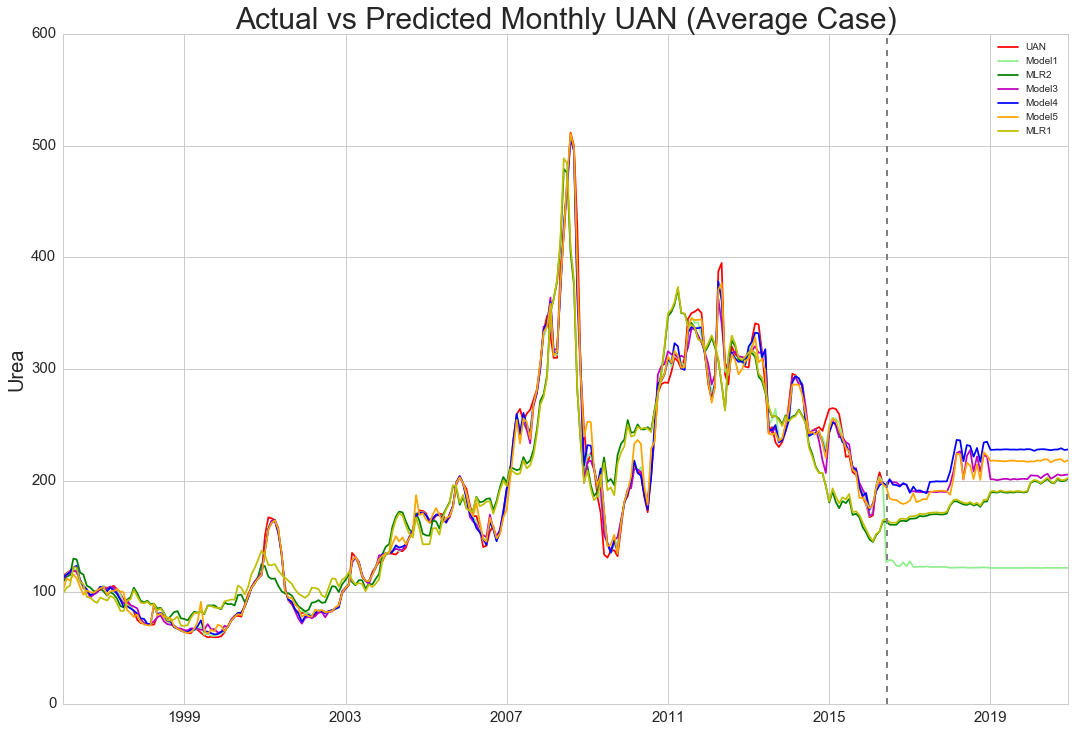

In [128]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['UAN'])
y2 = (df['Model1'])
y3 = (df['MLR2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['MLR1'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'lightgreen')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'y')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

#ax.annotate('Urea Predictions',
#                 xy=('2016-06-03', 60),
#                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
#                 xycoords='data')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Average Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Best Case

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmaybest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08


In [131]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000


## RDF Models I will use are 1, 3, 4, 5

In [132]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 43.083, test: 328.599
R^2 train: 0.995, test: 0.963
[ 0.01277108  0.3615462   0.14369504  0.0288135   0.42634474  0.009961
  0.01686844]


In [133]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 78.364, test: 517.728
R^2 train: 0.992, test: 0.941
[ 0.36735253  0.14169785  0.45122447  0.03972515]


In [134]:
#model 4
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 65.715, test: 404.613
R^2 train: 0.993, test: 0.954
[ 0.22708171  0.70455559  0.03945142  0.02891127]


In [135]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 69.926, test: 407.620
R^2 train: 0.993, test: 0.954
[ 0.87681802  0.07246471  0.05071727]


In [136]:
# comparing models that will be used
model1 = forest1.predict(X1)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model1 = pd.DataFrame(model1)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)

mlr1 = -102.5807 + (df_96on['My_Coal']*1.1411) + (df_96on['Crude']*0.8432) + (df_96on['Corn']*0.2079) + (df_96on['Gas']*6.3016) + (df_96on['Dollar']*0.7663)
mlr2 = -17.1480 + (df_96on['My_Coal']*1.0905) + (df_96on['Crude']*0.7366) + (df_96on['Corn']*0.1945) + (df_96on['Gas']*5.8042)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,Model1,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,100.228851,110.943809,114.596328,113.855253,114.077056,107.530579
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,96.730038,107.773952,114.267675,112.186453,111.070592,108.401399
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,100.690638,110.364517,112.859835,112.974293,111.152020,95.498961


### Predictions Part

In [137]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]  #goes with model 1
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1065:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1065:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1065:1304]  #goes with model 5
newpred.tail(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1301,12/11/2020,85.32,79.97,475.22,67,6,300000,900000
1302,12/18/2020,86.15,75.00,437.52,67,6,300000,900000
1303,12/25/2020,85.00,81.00,500.00,67,6,300000,900000


In [138]:
#each of the models added to predictions data part
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except urea
newpred_predicted1 = forest1.predict(newpred1) #goes with model 1
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1
0,2016-06-03,93.96,53.36,400.81,51.47,2.67,371191,1.04831e+06,123.655677
1,2016-06-10,95.44,55.39,396.11,52.71,3.09,371191,1.04831e+06,124.174991
2,2016-06-17,93.93,51.97,394.25,53.32,2.78,371191,1.04831e+06,123.840363
3,2016-06-24,92.9,57,390,54.5,3.9,371191,1.04831e+06,123.962877
4,2016-07-01,92.29,53.19,390.3,54.92,2.94,395415,1.1869e+06,124.121049
5,2016-07-08,92.42,56.79,398.32,55.32,3.31,395415,1.1869e+06,124.121049
6,2016-07-15,92.4,51.26,396.92,54.91,3.6,395415,1.1869e+06,124.121049
7,2016-07-22,92.19,51.68,402.3,55.33,2.81,395415,1.1869e+06,124.121049
8,2016-07-29,92.28,52.79,409.6,55.43,3.82,395415,1.1869e+06,124.121049
9,2016-08-05,92.61,52.49,400.25,54.91,2.56,381487,1.25076e+06,124.059690


In [139]:
#model 3, 4 & 5 and mLR models
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

mlrpredicted1 = -102.5807 + (newpred['My_Coal']*1.1411) + (newpred['Crude']*0.8432) + (newpred['Corn']*0.2079) + (newpred['Gas']*6.3016) + (newpred['Dollar']*0.7663)
mlrpredicted2 = -17.1480 + (newpred['My_Coal']*1.0905) + (newpred['Crude']*0.7366) + (newpred['Corn']*0.1945) + (newpred['Gas']*5.8042)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model3,Model4,Model5,MLR1,MLR2
0,2016-06-03,93.96,53.36,400.81,51.47,2.67,371191,1.04831e+06,123.655677,194.216563,194.023283,190.967944,173.3,171.74
1,2016-06-10,95.44,55.39,396.11,52.71,3.09,371191,1.04831e+06,124.174991,200.939342,198.217453,185.399459,179.23,176.111


In [140]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
237,437.52,75,2020-12-18,86.15,6,231.9,231.083,124.259614,181.601555,247.34889,236.65126,67,NaN,900000,300000
238,500,81,2020-12-25,85,6,249.067,247.655,224.141127,281.282668,275.47254,236.65126,67,NaN,900000,300000


In [141]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.596,113.855,114.077,107.531,100.229,110.944
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,114.268,112.186,111.071,108.401,96.73,107.774
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,112.86,112.974,111.152,95.499,100.691,110.365
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,112.675,112.542,110.899,94.9815,99.72,108.869
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,116.86,116.356,116.948,110.784,105.525,114.805
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,116.031,113,111.406,113.426,101.825,111.35
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,117.068,116.652,117.086,107.88,104.16,114.165
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,117.048,116.941,117.556,113.709,105.311,115.59
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,117.612,116.419,117.72,109.597,104.575,114.128
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,117.247,115.82,115.211,106.934,103.791,113.123


In [142]:
combined.to_csv("C:/Users/msteinme/Documents/UANmaybestresults.csv")

### Put Into Monthly

In [143]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.596,113.855,114.077,107.531,100.229,110.944
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,114.268,112.186,111.071,108.401,96.73,107.774


In [144]:
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)
df = combined.resample('MS',how='mean')

Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN               float64
Model1            float64
Model3            float64
Model4            float64
Model5            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [145]:
df.to_csv("C:/Users/msteinme/Documents/UANmaybestresultsmonthly.csv")

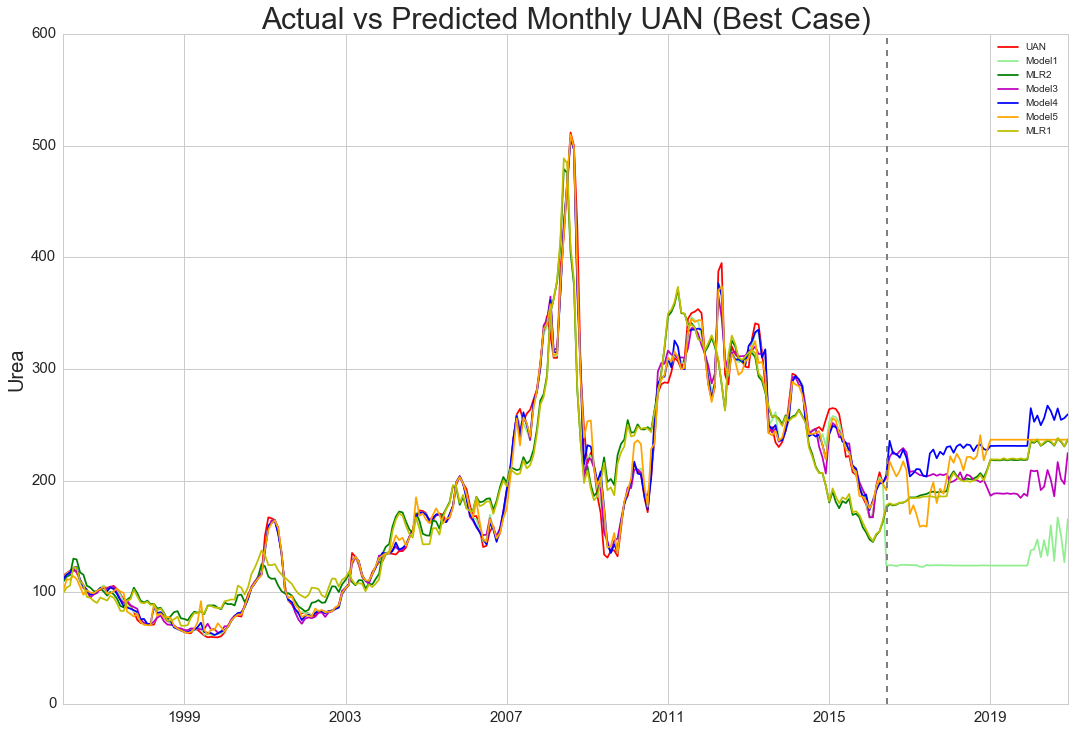

In [148]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['UAN'])
y2 = (df['Model1'])
y3 = (df['MLR2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['MLR1'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'lightgreen')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'y')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Worst Case

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmayworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08


In [150]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000


## RDF models used are models 1, 3, 4, 5

In [151]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 45.811, test: 313.660
R^2 train: 0.995, test: 0.964
[ 0.01275475  0.35888635  0.1228748   0.02903371  0.44963506  0.00938127
  0.01743407]


In [152]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 75.555, test: 512.377
R^2 train: 0.992, test: 0.942
[ 0.37429897  0.13921554  0.44689478  0.03959071]


In [153]:
#model 4
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 71.361, test: 404.645
R^2 train: 0.992, test: 0.954
[ 0.25642113  0.67709425  0.03923543  0.02724919]


In [154]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 69.932, test: 403.100
R^2 train: 0.993, test: 0.954
[ 0.87869799  0.07060393  0.05069808]


In [155]:
# comparing models that will be used
model1 = forest1.predict(X1)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model1 = pd.DataFrame(model1)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)

mlr1 = -102.5807 + (df_96on['My_Coal']*1.1411) + (df_96on['Crude']*0.8432) + (df_96on['Corn']*0.2079) + (df_96on['Gas']*6.3016) + (df_96on['Dollar']*0.7663)
mlr2 = -17.1480 + (df_96on['My_Coal']*1.0905) + (df_96on['Crude']*0.7366) + (df_96on['Corn']*0.1945) + (df_96on['Gas']*5.8042)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,Model1,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,100.228851,110.943809,114.881772,114.341333,113.106249,107.448324
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,96.730038,107.773952,113.607789,112.956928,110.842975,107.481441
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,100.690638,110.364517,112.910616,112.806400,110.732724,94.656435


### Predictions Part

In [156]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1065:1304]  #goes with model 1
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1065:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1065:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1065:1304]  #goes with model 5
newpred.tail(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1301,12/11/2020,98.71,47.96,400.32,51.21,2.59,500000,1200000
1302,12/18/2020,97.39,48.63,402.68,51.25,2.58,500000,1200000
1303,12/25/2020,97.20,54.00,403.00,51.30,2.56,500000,1200000


In [157]:
#each of the models added to predictions data part
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except urea
newpred_predicted1 = forest1.predict(newpred1) #goes with model 1
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1
0,2016-06-03,96.96,42.34,385.95,49.47,1.96,618651,1.04831e+06,131.602011
1,2016-06-10,96.58,49.71,412.1,50.63,1.99,618651,1.04831e+06,132.168411
2,2016-06-17,95.76,43.09,371.93,51.34,2.19,618651,1.04831e+06,131.877211
3,2016-06-24,99.7,39,365,49.4,1.95,618651,1.04831e+06,130.522011
4,2016-07-01,98.35,39,369.67,49.64,1.97,659025,1.1869e+06,132.388526
5,2016-07-08,99.68,39,369.39,50.27,2.04,659025,1.1869e+06,132.471954
6,2016-07-15,98.14,39,365.81,49.7,1.98,659025,1.1869e+06,132.302583
7,2016-07-22,98.32,39,368.13,49.85,1.97,659025,1.1869e+06,132.302583
8,2016-07-29,98.64,39,367.06,50.95,2.01,659025,1.1869e+06,132.165440
9,2016-08-05,99.15,39,368.15,50.09,2,635811,1.25076e+06,132.093211


In [158]:
#model 3, 4 & 5 and mLR models
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

mlrpredicted1 = -102.5807 + (newpred['My_Coal']*1.1411) + (newpred['Crude']*0.8432) + (newpred['Corn']*0.2079) + (newpred['Gas']*6.3016) + (newpred['Dollar']*0.7663)
mlrpredicted2 = -17.1480 + (newpred['My_Coal']*1.0905) + (newpred['Crude']*0.7366) + (newpred['Corn']*0.1945) + (newpred['Gas']*5.8042)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model3,Model4,Model5,MLR1,MLR2
0,2016-06-03,96.96,42.34,385.95,49.47,1.96,618651,1.04831e+06,131.602011,192.602880,178.055680,180.952713,156.461,154.43
1,2016-06-10,96.58,49.71,412.1,50.63,1.99,618651,1.04831e+06,132.168411,198.807083,195.961056,192.394687,169.334,166.384


In [159]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
237,402.68,48.63,2020-12-18,97.39,2.58,171.511,167.857,128.033458,192.213239,187.80112,180.751381,51.25,NaN,1.2e+06,500000
238,403,54,2020-12-25,97.2,2.56,175.891,171.813,128.006029,192.548455,187.80112,180.217438,51.3,NaN,1.2e+06,500000


In [160]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model3','Model4','Model5','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.882,114.341,113.106,107.448,100.229,110.944
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,113.608,112.957,110.843,107.481,96.73,107.774
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,112.911,112.806,110.733,94.6564,100.691,110.365
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,112.658,112.502,110.607,94.128,99.72,108.869
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,116.557,116.543,116.329,111.713,105.525,114.805
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,115.501,112.701,111.094,114.193,101.825,111.35
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,116.977,117.756,116.988,108.67,104.16,114.165
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,117.006,117.704,117.154,114.505,105.311,115.59
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,116.948,117.339,117.609,109.133,104.575,114.128
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,116.631,116.703,116.385,107.162,103.791,113.123


In [161]:
combined.to_csv("C:/Users/msteinme/Documents/UANmayworstresults.csv")

### Put into Monthly

In [162]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model3,Model4,Model5,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,114.882,114.341,113.106,107.448,100.229,110.944
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,113.608,112.957,110.843,107.481,96.73,107.774


In [163]:
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)
df = combined.resample('MS',how='mean')

Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN               float64
Model1            float64
Model3            float64
Model4            float64
Model5            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [164]:
df.to_csv("C:/Users/msteinme/Documents/UANmayworstresultsmonthly.csv")

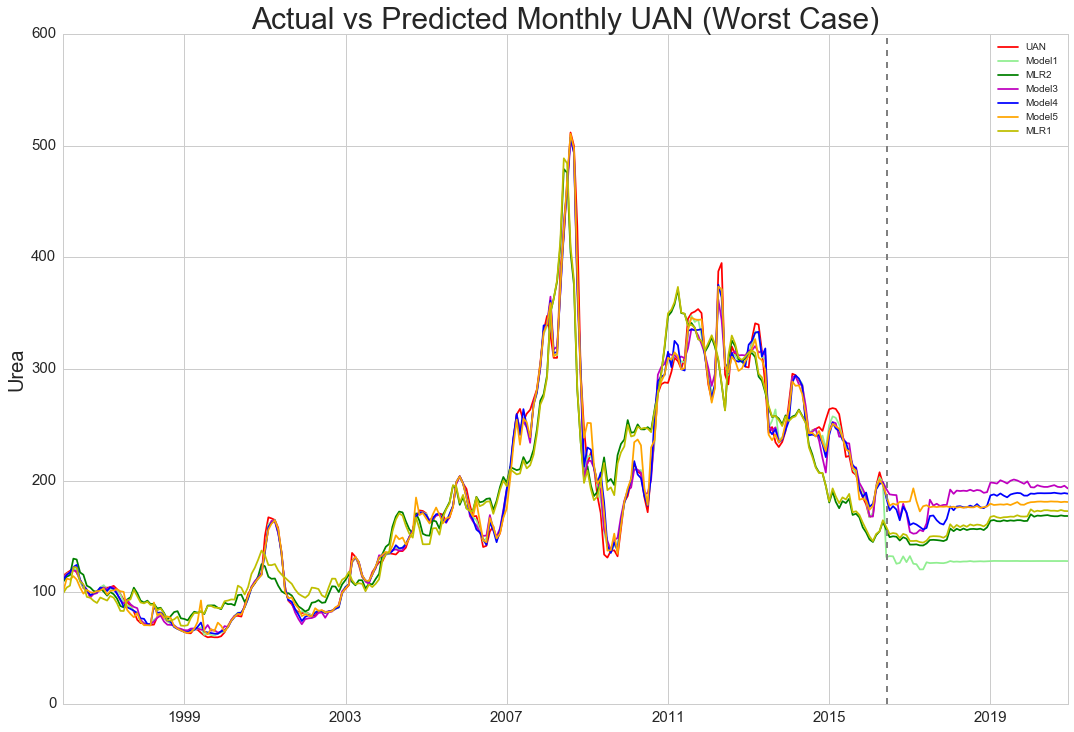

In [165]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['UAN'])
y2 = (df['Model1'])
y3 = (df['MLR2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['MLR1'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'lightgreen')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'y')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()